In [145]:
import numpy as np
import pprint
import sys 
import gym
from lib.envs.frozen_lake import RewardingFrozenLakeEnv
from lib.solvers import PolicyIterationSolver, ValueIterationSolver, QLearningSolver
import matplotlib.pyplot as plt
import matplotlib.patheffects as path_effects
import seaborn as sns
import pandas as pd

In [2]:
def plot_policy_map(title, solver, reshape_size, fig_size):
    policy = np.array([np.where(r==1)[0][0] for r in solver._policy]).reshape(reshape_size)
    map_desc = solver._env.desc
    color_map = solver._env.colors()
    direction_map = solver._env.directions()
    fig = plt.figure(figsize=fig_size)
    ax = fig.add_subplot(111, xlim=(0, policy.shape[1]), ylim=(0, policy.shape[0]))
    font_size = 'x-large'
    if policy.shape[1] > 16:
        font_size = 'small'
    plt.title(title)
    for i in range(policy.shape[0]):
        for j in range(policy.shape[1]):
            y = policy.shape[0] - i - 1
            x = j
            p = plt.Rectangle([x, y], 1, 1)
            p.set_facecolor(color_map[map_desc[i, j]])
            ax.add_patch(p)

            text = ax.text(x+0.5, y+0.5, direction_map[policy[i, j]], weight='bold', size=font_size,
                           horizontalalignment='center', verticalalignment='center', color='w')
            text.set_path_effects([path_effects.Stroke(linewidth=2, foreground='black'),
                                   path_effects.Normal()])

    plt.axis('off')
    plt.xlim((0, policy.shape[1]))
    plt.ylim((0, policy.shape[0]))
    plt.tight_layout()

    return plt

def plot_value_map(title, v, map_desc, color_map, size):
    fig = plt.figure(figsize=size)
    ax = fig.add_subplot(111, xlim=(0, v.shape[1]), ylim=(0, v.shape[0]))
    font_size = 'x-large'
    if v.shape[1] > 16:
        font_size = 'small'

    v_min = np.min(v)
    v_max = np.max(v)
    bins = np.linspace(v_min, v_max, 100)
    v_red = np.digitize(v, bins)/100.0
    for i in range(v.shape[0]):
        for j in range(v.shape[1]):
            value = np.round(v[i, j], 2)
            if len(str(value)) > 4:
                font_size = 'small'

    plt.title(title)
    for i in range(v.shape[0]):
        for j in range(v.shape[1]):
            y = v.shape[0] - i - 1
            x = j
            p = plt.Rectangle([x, y], 1, 1)
            p.set_facecolor(color_map[map_desc[i, j]])
            ax.add_patch(p)

            value = np.round(v[i, j], 2)

            red = v_red[i, j]
            text2 = ax.text(x+0.5, y+0.5, value, size=font_size,
                            horizontalalignment='center', verticalalignment='center', color=(1.0, 1.0-red, 1.0-red))
            text2.set_path_effects([path_effects.Stroke(linewidth=1, foreground='black'),
                                   path_effects.Normal()])

    plt.axis('off')
    plt.xlim((0, v.shape[1]))
    plt.ylim((0, v.shape[0]))
    plt.tight_layout()

    return plt

In [3]:
reward_smallPolicyIterationIters = []
reward_smallPolicyIterationTime = []
reward_largePolicyIterationIters = []
reward_largePolicyIterationTime = []
for p in np.around(np.linspace(0, 1, 21), decimals=2):
    
    smallRewardingFrozenLakeEnv = RewardingFrozenLakeEnv(transition_prob=p,  map_name="4x4")
    solver_1 = PolicyIterationSolver(smallRewardingFrozenLakeEnv, discount_factor=1)
    solver_1.run_until_converged()
    reward_smallPolicyIterationTime.append(sum(solver_1._step_times))
    reward_smallPolicyIterationIters.append(solver_1._steps)
    
    largeRewardingFrozenLakeEnv = RewardingFrozenLakeEnv(transition_prob=p, map_name="20x20")
    solver_2 = PolicyIterationSolver(largeRewardingFrozenLakeEnv, discount_factor=1)
    solver_2.run_until_converged()
    reward_largePolicyIterationTime.append(sum(solver_2._step_times))
    reward_largePolicyIterationIters.append(solver_2._steps)

    print("done with p=" + str(p))
    

done with p=0.0
done with p=0.05
done with p=0.1
done with p=0.15
done with p=0.2
done with p=0.25
done with p=0.3
done with p=0.35
done with p=0.4
done with p=0.45
done with p=0.5
done with p=0.55
done with p=0.6
done with p=0.65
done with p=0.7
done with p=0.75
done with p=0.8
done with p=0.85
done with p=0.9
done with p=0.95
done with p=1.0


In [4]:
discount_smallPolicyIterationTime = []
discount_smallPolicyIterationIters = []
discount_largePolicyIterationIters = []
discount_largePolicyIterationTime = []
for p in np.around(np.linspace(0, 1, 21), decimals=2):
    
    smallRewardingFrozenLakeEnv = RewardingFrozenLakeEnv(transition_prob=p, map_name="4x4", step_reward=0)
    solver_1 = PolicyIterationSolver(smallRewardingFrozenLakeEnv, discount_factor=.9)
    solver_1.run_until_converged()
    discount_smallPolicyIterationTime.append(sum(solver_1._step_times))
    discount_smallPolicyIterationIters.append(solver_1._steps)
    
    largeRewardingFrozenLakeEnv = RewardingFrozenLakeEnv(transition_prob=p, map_name="20x20", step_reward=0)
    solver_2 = PolicyIterationSolver(largeRewardingFrozenLakeEnv, discount_factor=.9)
    solver_2.run_until_converged()
    discount_largePolicyIterationTime.append(sum(solver_2._step_times))
    discount_largePolicyIterationIters.append(solver_2._steps)
    print("Done with p=" + str(p))

Done with p=0.0
Done with p=0.05
Done with p=0.1
Done with p=0.15
Done with p=0.2
Done with p=0.25
Done with p=0.3
Done with p=0.35
Done with p=0.4
Done with p=0.45
Done with p=0.5
Done with p=0.55
Done with p=0.6
Done with p=0.65
Done with p=0.7
Done with p=0.75
Done with p=0.8
Done with p=0.85
Done with p=0.9
Done with p=0.95
Done with p=1.0


In [5]:
reward_smallValueIterationTime = []
reward_smallValueIterationIters = []
reward_largeValueIterationTime = []
reward_largeValueIterationIters = []
for p in np.around(np.linspace(0, 1, 21), decimals=2):
    
    smallRewardingFrozenLakeEnv = RewardingFrozenLakeEnv(transition_prob=p, map_name="4x4")
    solver_1 = ValueIterationSolver(smallRewardingFrozenLakeEnv, discount_factor=1)
    solver_1.run_until_converged()
    reward_smallValueIterationTime.append(sum(solver_1._step_times))
    reward_smallValueIterationIters.append(solver_1._steps)
    
    largeRewardingFrozenLakeEnv = RewardingFrozenLakeEnv(transition_prob=p, map_name="20x20")
    solver_2 = ValueIterationSolver(largeRewardingFrozenLakeEnv, discount_factor=1)
    solver_2.run_until_converged()
    
    reward_largeValueIterationTime.append(sum(solver_2._step_times))
    reward_largeValueIterationIters.append(solver_2._steps)
    
    print("Done with p=" + str(p))

Done with p=0.0
Done with p=0.05
Done with p=0.1
Done with p=0.15
Done with p=0.2
Done with p=0.25
Done with p=0.3
Done with p=0.35
Done with p=0.4
Done with p=0.45
Done with p=0.5
Done with p=0.55
Done with p=0.6
Done with p=0.65
Done with p=0.7
Done with p=0.75
Done with p=0.8
Done with p=0.85
Done with p=0.9
Done with p=0.95
Done with p=1.0


In [6]:
discount_smallValueIterationTime = []
discount_smallValueIterationIters = []
discount_largeValueIterationTime = []
discount_largeValueIterationIters = []
for p in np.around(np.linspace(0, 1, 21), decimals=2):
    
    smallRewardingFrozenLakeEnv = RewardingFrozenLakeEnv(transition_prob=p, map_name="4x4", step_reward=0)
    solver_1 = ValueIterationSolver(smallRewardingFrozenLakeEnv, discount_factor=.9)
    solver_1.run_until_converged()
    discount_smallValueIterationTime.append(sum(solver_1._step_times))
    discount_smallValueIterationIters.append(solver_1._steps)
    
    largeRewardingFrozenLakeEnv = RewardingFrozenLakeEnv(transition_prob=p, map_name="20x20", step_reward=0)
    solver_2 = ValueIterationSolver(largeRewardingFrozenLakeEnv, discount_factor=.9)
    solver_2.run_until_converged()
    discount_largeValueIterationTime.append(sum(solver_2._step_times))
    discount_largeValueIterationIters.append(solver_2._steps)
    
    print("Done with p=" + str(p))

Done with p=0.0
Done with p=0.05
Done with p=0.1
Done with p=0.15
Done with p=0.2
Done with p=0.25
Done with p=0.3
Done with p=0.35
Done with p=0.4
Done with p=0.45
Done with p=0.5
Done with p=0.55
Done with p=0.6
Done with p=0.65
Done with p=0.7
Done with p=0.75
Done with p=0.8
Done with p=0.85
Done with p=0.9
Done with p=0.95
Done with p=1.0


Text(0,0.5,'Time')

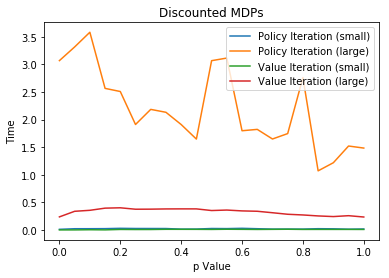

In [31]:
plt.plot(np.linspace(0, 1, 21), discount_smallPolicyIterationTime)
plt.plot(np.linspace(0, 1, 21), discount_largePolicyIterationTime)
plt.plot(np.linspace(0, 1, 21), discount_smallValueIterationTime)
plt.plot(np.linspace(0, 1, 21), discount_largeValueIterationTime)
plt.title("Discounted MDPs")
plt.legend(["Policy Iteration (small)", "Policy Iteration (large)", "Value Iteration (small)", "Value Iteration (large)"])
plt.xlabel("p Value")
plt.ylabel("Time")

(0, 100)

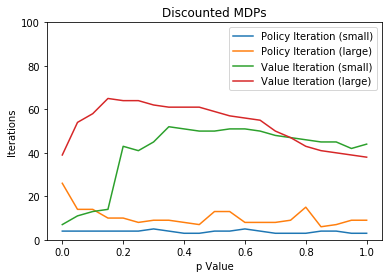

In [32]:
plt.plot(np.linspace(0, 1, 21), discount_smallPolicyIterationIters)
plt.plot(np.linspace(0, 1, 21), discount_largePolicyIterationIters)
plt.plot(np.linspace(0, 1, 21), discount_smallValueIterationIters)
plt.plot(np.linspace(0, 1, 21), discount_largeValueIterationIters)

plt.title("Discounted MDPs")
plt.legend(["Policy Iteration (small)", "Policy Iteration (large)", "Value Iteration (small)", "Value Iteration (large)"])
plt.xlabel("p Value")
plt.ylabel("Iterations")
plt.ylim(0, 100)

Text(0,0.5,'Iterations')

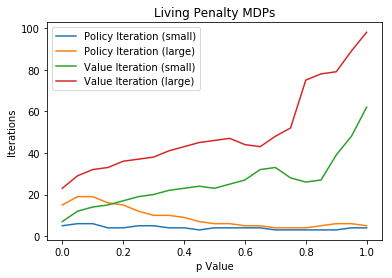

In [24]:
plt.plot(np.linspace(0, 1, 21), reward_smallPolicyIterationIters)
plt.plot(np.linspace(0, 1, 21), reward_largePolicyIterationIters)
plt.plot(np.linspace(0, 1, 21), reward_smallValueIterationIters)
plt.plot(np.linspace(0, 1, 21), reward_largeValueIterationIters)
plt.title("Living Penalty MDPs")
plt.legend(["Policy Iteration (small)", "Policy Iteration (large)", "Value Iteration (small)", "Value Iteration (large)"])
plt.xlabel("p Value")
plt.ylabel("Iterations")

(0, 3.5)

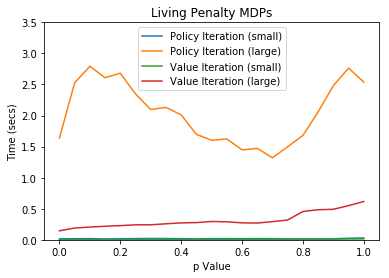

In [34]:
plt.plot(np.linspace(0, 1, 21), reward_smallPolicyIterationTime)
plt.plot(np.linspace(0, 1, 21), reward_largePolicyIterationTime)
plt.plot(np.linspace(0, 1, 21), reward_smallValueIterationTime)
plt.plot(np.linspace(0, 1, 21), reward_largeValueIterationTime)
plt.ylabel("Time (secs)")
plt.xlabel("p Value")
plt.title("Living Penalty MDPs")
plt.legend(["Policy Iteration (small)", "Policy Iteration (large)", "Value Iteration (small)", "Value Iteration (large)"])
plt.ylim(0, 3.5)

<module 'matplotlib.pyplot' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

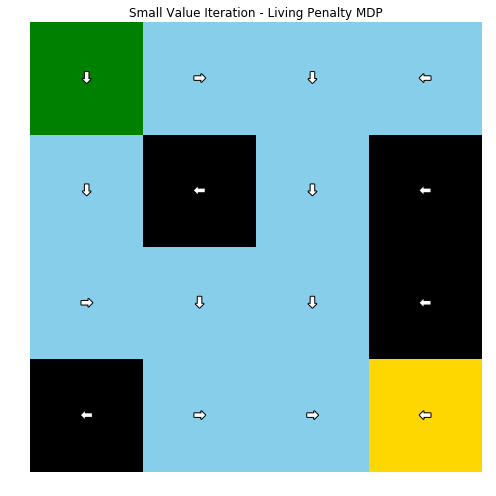

In [59]:
# value iter small living penalty.
smallRewardingFrozenLakeEnv = RewardingFrozenLakeEnv(transition_prob=.2, map_name="4x4")
solver_1 = ValueIterationSolver(smallRewardingFrozenLakeEnv, discount_factor=1)
solver_1.run_until_converged()
plot_policy_map("Small Value Iteration - Living Penalty MDP", solver_1, (7,7))

<module 'matplotlib.pyplot' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

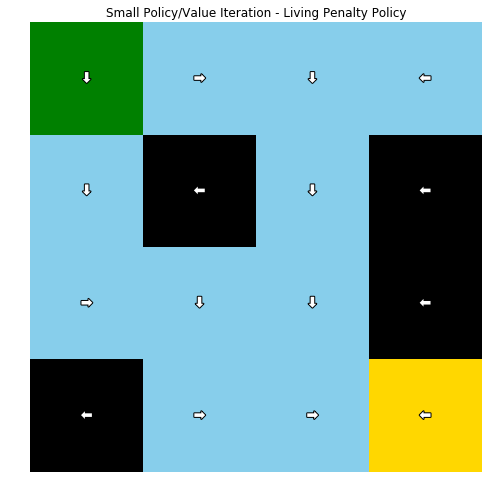

In [63]:
# value iter small living penalty.
smallRewardingFrozenLakeEnv = RewardingFrozenLakeEnv(transition_prob=.2, map_name="4x4")
solver_1 = PolicyIterationSolver(smallRewardingFrozenLakeEnv, discount_factor=1)
solver_1.run_until_converged()
plot_policy_map("Small Policy/Value Iteration - Living Penalty Policy", solver_1, (7,7))

<module 'matplotlib.pyplot' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

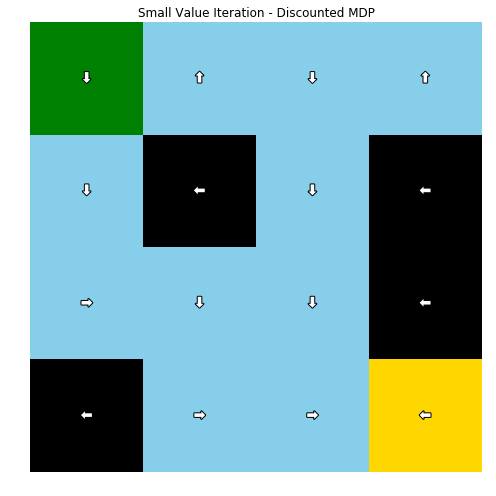

In [61]:
smallRewardingFrozenLakeEnv = RewardingFrozenLakeEnv(transition_prob=.2, map_name="4x4", step_reward=0)
solver_1 = ValueIterationSolver(smallRewardingFrozenLakeEnv, discount_factor=.9)
solver_1.run_until_converged()
plot_policy_map("Small Value Iteration - Discounted MDP", solver_1, (7,7))

<module 'matplotlib.pyplot' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

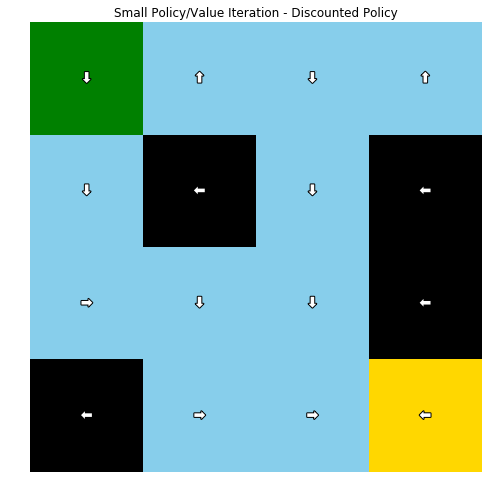

In [72]:
smallRewardingFrozenLakeEnv = RewardingFrozenLakeEnv(transition_prob=.2, map_name="4x4", step_reward=0)
solver_1 = PolicyIterationSolver(smallRewardingFrozenLakeEnv, discount_factor=.9)
solver_1.run_until_converged()
plot_policy_map("Small Policy/Value Iteration - Discounted Policy", solver_1, (4,4), (7,7))

<module 'matplotlib.pyplot' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

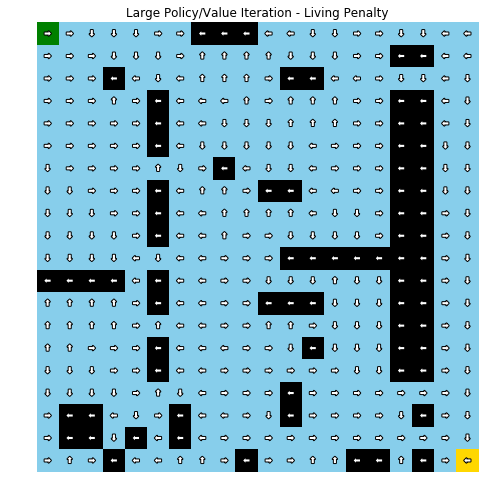

In [84]:
# value iter small living penalty.
smallRewardingFrozenLakeEnv = RewardingFrozenLakeEnv(transition_prob=.2, map_name="20x20")
solver_1 = ValueIterationSolver(smallRewardingFrozenLakeEnv, discount_factor=1)
solver_1.run_until_converged()
plot_policy_map("Large Policy/Value Iteration - Living Penalty", solver_1, (20,20), (7,7))

<module 'matplotlib.pyplot' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

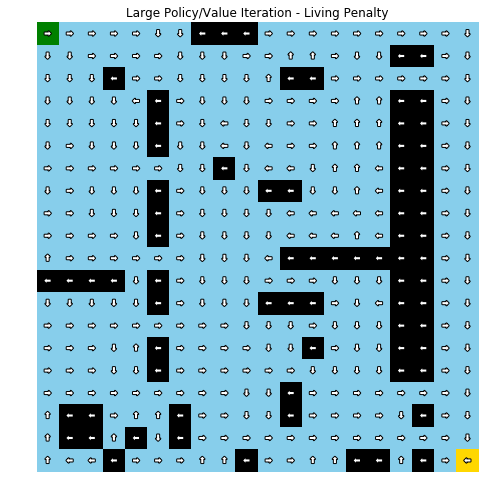

In [85]:
# value iter small living penalty.
smallRewardingFrozenLakeEnv = RewardingFrozenLakeEnv(transition_prob=.2, map_name="20x20")
solver_1 = ValueIterationSolver(smallRewardingFrozenLakeEnv, discount_factor=.9)
solver_1.run_until_converged()
plot_policy_map("Large Policy/Value Iteration - Living Penalty", solver_1, (20,20), (7,7))

<module 'matplotlib.pyplot' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

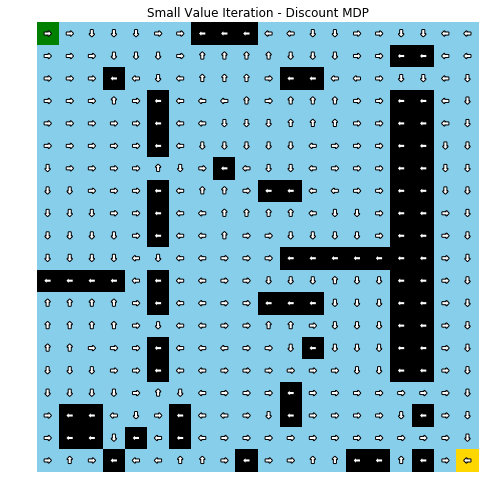

In [73]:
# value iter small living penalty.
smallRewardingFrozenLakeEnv = RewardingFrozenLakeEnv(transition_prob=.2, map_name="20x20")
solver_1 = PolicyIterationSolver(smallRewardingFrozenLakeEnv, discount_factor=1)
solver_1.run_until_converged()
plot_policy_map("Small Value Iteration - Discount MDP", solver_1, (20, 20), (7,7))

<module 'matplotlib.pyplot' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

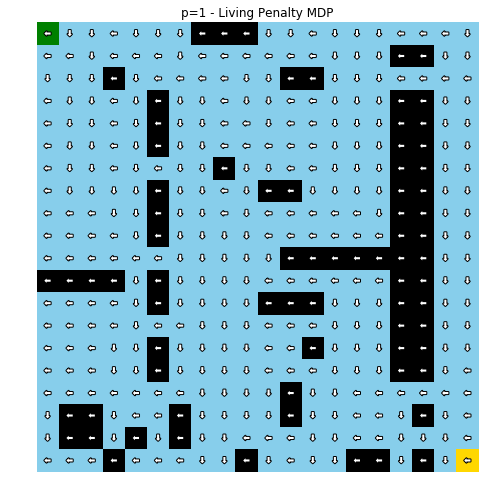

In [81]:
# value iter small living penalty.
smallRewardingFrozenLakeEnv = RewardingFrozenLakeEnv(transition_prob=1, map_name="20x20")
solver_1 = ValueIterationSolver(smallRewardingFrozenLakeEnv, discount_factor=1)
solver_1.run_until_converged()
plot_policy_map("p=1 - Living Penalty MDP", solver_1, (20, 20), (7,7))

<module 'matplotlib.pyplot' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

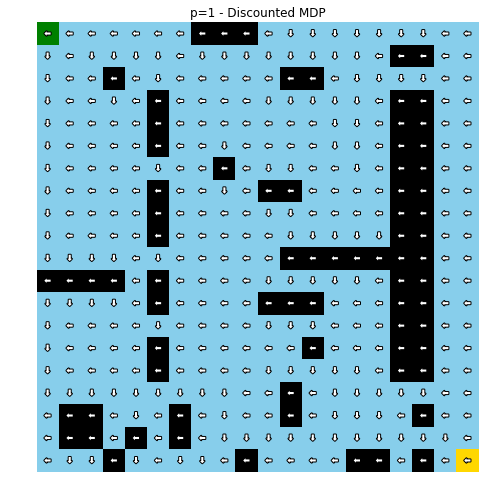

In [79]:
# value iter small living penalty.
smallRewardingFrozenLakeEnv = RewardingFrozenLakeEnv(transition_prob=1, map_name="20x20", step_reward=0)
solver_1 = ValueIterationSolver(smallRewardingFrozenLakeEnv, discount_factor=.9)
solver_1.run_until_converged()
plot_policy_map("p=1 - Discounted MDP", solver_1, (20, 20), (7,7))

In [43]:
solver_q = QLearningSolver(RewardingFrozenLakeEnv(transition_prob=1, map_name="4x4", step_reward=0), 500, discount_factor=.9)

In [44]:
solver_q.run_until_converged()

In [224]:
def get_q_stats(env, steps):    
    epsilon_time_relation = {}
    epsilon_p_score_relation = {}
    for e in [0, .1, .2, .3, .4, .5, .6, .7, .8, .9, 1]:
        for p in [0, .1, .2, .3, .4, .5, .6, .7, .8, .9, 1]:
            solver_q = None
            if env == "small":
                solver_q = QLearningSolver(RewardingFrozenLakeEnv(transition_prob=p, map_name="4x4", step_reward=0), steps, epsilon=e, discount_factor=.9)
            else:
                solver_q = QLearningSolver(RewardingFrozenLakeEnv(transition_prob=p, map_name="20x20", step_reward=0), steps, epsilon=e, discount_factor=.9)
                
            solver_q.run_until_converged()
            if e not in epsilon_p_score_relation: epsilon_p_score_relation[e] = {}
            if e not in epsilon_time_relation: epsilon_time_relation[e] = []
            epsilon_p_score_relation[e][p] = sum(solver_q._stats.episode_rewards)
            epsilon_time_relation[e].append(sum(solver_q._step_times))
            print("Completed p: " + str(p) + " and e: " + str(e))
    return epsilon_time_relation, epsilon_p_score_relation

In [225]:
small_epsilon_time_relation, small_epsilon_p_score_relation = get_q_stats("small", 10000)

Completed p: 0 and e: 0
Completed p: 0.1 and e: 0
Completed p: 0.2 and e: 0
Completed p: 0.3 and e: 0
Completed p: 0.4 and e: 0
Completed p: 0.5 and e: 0
Completed p: 0.6 and e: 0
Completed p: 0.7 and e: 0
Completed p: 0.8 and e: 0
Completed p: 0.9 and e: 0
Completed p: 1 and e: 0
Completed p: 0 and e: 0.1
Completed p: 0.1 and e: 0.1
Completed p: 0.2 and e: 0.1
Completed p: 0.3 and e: 0.1
Completed p: 0.4 and e: 0.1
Completed p: 0.5 and e: 0.1
Completed p: 0.6 and e: 0.1
Completed p: 0.7 and e: 0.1
Completed p: 0.8 and e: 0.1
Completed p: 0.9 and e: 0.1
Completed p: 1 and e: 0.1
Completed p: 0 and e: 0.2
Completed p: 0.1 and e: 0.2
Completed p: 0.2 and e: 0.2
Completed p: 0.3 and e: 0.2
Completed p: 0.4 and e: 0.2
Completed p: 0.5 and e: 0.2
Completed p: 0.6 and e: 0.2
Completed p: 0.7 and e: 0.2
Completed p: 0.8 and e: 0.2
Completed p: 0.9 and e: 0.2
Completed p: 1 and e: 0.2
Completed p: 0 and e: 0.3
Completed p: 0.1 and e: 0.3
Completed p: 0.2 and e: 0.3
Completed p: 0.3 and e: 0.3


In [226]:
large_epsilon_time_relation, large_epsilon_p_score_relation = get_q_stats("large", 10000)

Completed p: 0 and e: 0
Completed p: 0.1 and e: 0
Completed p: 0.2 and e: 0
Completed p: 0.3 and e: 0
Completed p: 0.4 and e: 0
Completed p: 0.5 and e: 0
Completed p: 0.6 and e: 0
Completed p: 0.7 and e: 0
Completed p: 0.8 and e: 0
Completed p: 0.9 and e: 0
Completed p: 1 and e: 0
Completed p: 0 and e: 0.1
Completed p: 0.1 and e: 0.1
Completed p: 0.2 and e: 0.1
Completed p: 0.3 and e: 0.1
Completed p: 0.4 and e: 0.1
Completed p: 0.5 and e: 0.1
Completed p: 0.6 and e: 0.1
Completed p: 0.7 and e: 0.1
Completed p: 0.8 and e: 0.1
Completed p: 0.9 and e: 0.1
Completed p: 1 and e: 0.1
Completed p: 0 and e: 0.2
Completed p: 0.1 and e: 0.2
Completed p: 0.2 and e: 0.2
Completed p: 0.3 and e: 0.2
Completed p: 0.4 and e: 0.2
Completed p: 0.5 and e: 0.2
Completed p: 0.6 and e: 0.2
Completed p: 0.7 and e: 0.2
Completed p: 0.8 and e: 0.2
Completed p: 0.9 and e: 0.2
Completed p: 1 and e: 0.2
Completed p: 0 and e: 0.3
Completed p: 0.1 and e: 0.3
Completed p: 0.2 and e: 0.3
Completed p: 0.3 and e: 0.3


In [216]:
mean_ep_large = np.array(11, dtype="float32")
mean_ep_small = np.array(11)
for i in large_epsilon_time_relation:
    mean_ep_large = mean_ep_large + large_epsilon_time_relation[i]
    mean_ep_small = mean_ep_small + small_epsilon_time_relation[i]
mean_ep_large /= len(large_epsilon_time_relation)
mean_ep_small /= len(small_epsilon_time_relation)
x = [0, .1, .2, .3, .4, .5, .6, .7, .8, .9, 1]

In [217]:
mean_ep

array([ 28.87800548,  52.50051389, 147.97994621, 171.97646239,
       242.63271392, 289.93633136, 287.29310632, 285.66214806,
       282.61156537, 278.14250853, 287.98568499])

Text(0,0.5,'Time (seconds)')

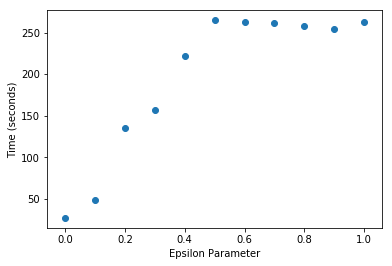

In [218]:
plt.scatter(x, mean_ep_large)
plt.xlabel("Epsilon Parameter")
plt.ylabel("Time (seconds)")

Text(0,0.5,'Time (seconds)')

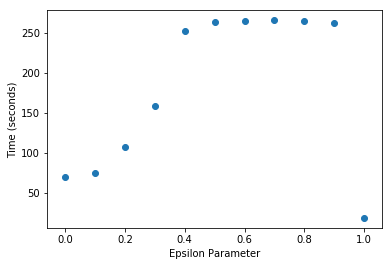

In [223]:
plt.scatter(x, mean_ep_small)
plt.xlabel("Epsilon Parameter")
plt.ylabel("Time (seconds)")

Text(0.5,33,'epsilon')

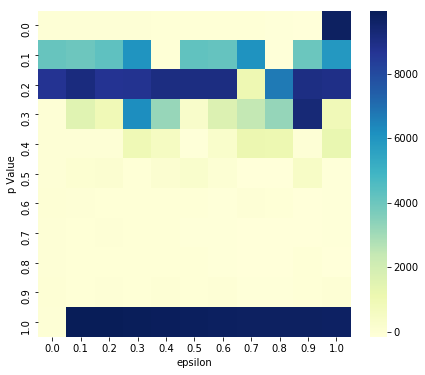

In [240]:
plt.figure(figsize=(7,6))
ax1 = sns.heatmap(pd.DataFrame(small_epsilon_p_score_relation), cmap="YlGnBu")
ax1.set_ylabel("p Value")
ax1.set_xlabel("epsilon")

Text(0.5,33,'epsilon')

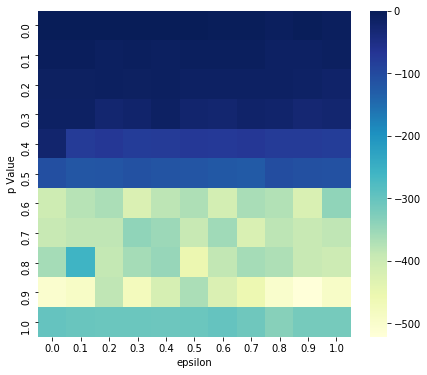

In [239]:
plt.figure(figsize=(7,6))
ax1 = sns.heatmap(pd.DataFrame(large_epsilon_p_score_relation), cmap="YlGnBu")
ax1.set_ylabel("p Value")
ax1.set_xlabel("epsilon")


Text(3.2,0.5,'p Value')